# Clustering

See our notes on [unsupervised learning](https://jennselby.github.io/MachineLearningCourseNotes/#unsupervised-learning), [K-means](https://jennselby.github.io/MachineLearningCourseNotes/#k-means-clustering), [DBSCAN](https://jennselby.github.io/MachineLearningCourseNotes/#dbscan-clustering), and [clustering validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation).

For documentation of various clustering methods in scikit-learn, see http://scikit-learn.org/stable/modules/clustering.html

This code was based on the example at http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
which has the following comments:

Code source: Gaël Varoquaux<br/>
Modified for documentation by Jaques Grobler<br/>
License: BSD 3 clause
## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
1. Read through the code in the following sections:
    * [Iris Dataset](#Iris-Dataset)
    * [Visualization](#Visualization)
    * [Training and Visualization](#Training-and-Visualization)
2. Complete the three-part [Exercise](#Exercise)

In [3]:
%matplotlib inline
import numpy
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

import pandas

## Iris Dataset

Before you go on, if you haven't used the iris dataset in a previous assignment, make sure you understand it. Modify the cell below to examine different parts of the dataset that are contained in the iris dictionary object.

What are the features? What are we trying to classify?

In [4]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

## Visualization Setup

In [6]:
# We can only plot 3 of the 4 iris features, since we only see in 3D.
# These are the ones the example code picked
X_FEATURE = 'petal width (cm)' 
Y_FEATURE = 'sepal length (cm)' 
Z_FEATURE = 'petal length (cm)'

# set some bounds for the figures that will display the plots of clusterings with various
# hyperparameter settings
# this allows for NUM_COLS * NUM_ROWS plots in the figure
NUM_COLS = 4
NUM_ROWS = 6
FIG_WIDTH = 4 * NUM_COLS
FIG_HEIGHT = 3 * NUM_ROWS

def add_plot(figure, subplot_num, subplot_name, data, labels):
    '''Create a new subplot in the figure.'''

    # create a new subplot
    axis = figure.add_subplot(NUM_ROWS, NUM_COLS, subplot_num, projection='3d',
                              elev=48, azim=134)

    # Plot three of the four features on the graph, and set the color according to the labels
    axis.scatter(data[X_FEATURE], data[Y_FEATURE], data[Z_FEATURE], c=labels)

    # get rid of the tick numbers. Otherwise, they all overlap and it looks horrible
    for axis_obj in [axis.w_xaxis, axis.w_yaxis, axis.w_zaxis]:
        axis_obj.set_ticklabels([])

    # label the subplot
    axis.title.set_text(subplot_name)

## Visualization

This is the correct labeling, based on the targets.

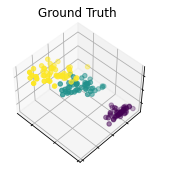

In [7]:
# start a new figure to hold all of the subplots
truth_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(truth_figure, 1, "Ground Truth", iris_df, iris.target)

## Training and Visualization

Now let's see how k-means clusters the iris dataset, with various different numbers of clusters

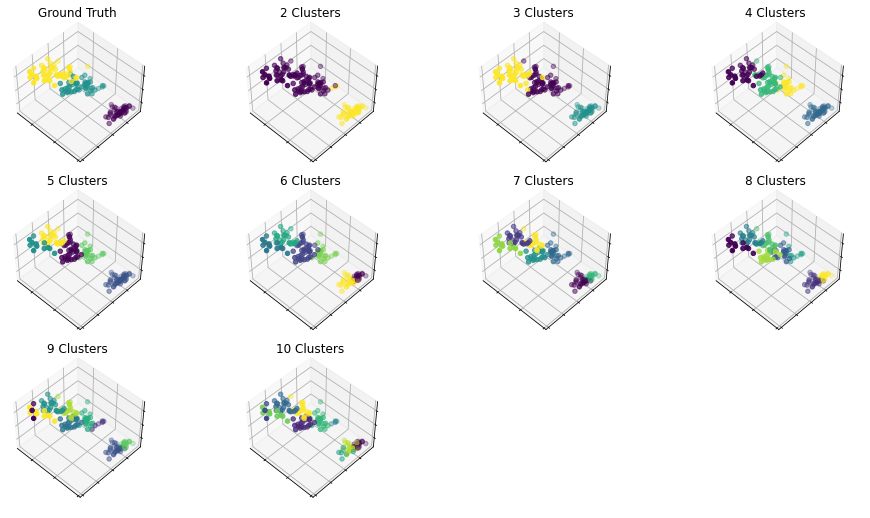

In [8]:
MAX_CLUSTERS = 10
# start a new figure to hold all of the subplots
kmeans_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(kmeans_figure, 1, "Ground Truth", iris_df, iris.target)

plot_num = 2
for num_clusters in range(2, MAX_CLUSTERS + 1):
    # train the model
    model = KMeans(n_clusters=num_clusters)
    model.fit(iris_df)
    
    # get the predictions of which cluster each input is in
    labels = model.labels_

    # plot this clustering
    title = '{} Clusters'.format(num_clusters) 
    add_plot(kmeans_figure, plot_num, title, iris_df, labels.astype(numpy.float))
    plot_num += 1
    


# Exercise

1. Add [validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation) to measure how good the clustering is, with different numbers of clusters.
1. Run the iris data through DBSCAN or hierarchical clustering and validate that as well.
1. Comment on the validation results, explaining which models did best and why you think that might be.

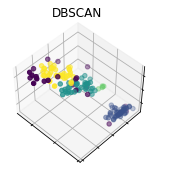

In [26]:
import numpy
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics

import pandas

iris = datasets.load_iris()
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_dfTarget = [iris.target_names[target] for target in iris.target] #get catagorical data

enc_mjob = preprocessing.LabelEncoder() #transform it into an array we can use as the truthful array.
encoded_mjob = enc_mjob.fit_transform(iris_dfTarget)
iris_dfTargetNum = encoded_mjob #merge it with the dataset (unnecessary)

#INPUT VISUALIZATION AND PREVIOUSLY GIVEN CODE

# We can only plot 3 of the 4 iris features, since we only see in 3D.
# These are the ones the example code picked
X_FEATURE = 'petal width (cm)' 
Y_FEATURE = 'sepal length (cm)' 
Z_FEATURE = 'petal length (cm)'

# set some bounds for the figures that will display the plots of clusterings with various
# hyperparameter settings
# this allows for NUM_COLS * NUM_ROWS plots in the figure
NUM_COLS = 4
NUM_ROWS = 6
FIG_WIDTH = 4 * NUM_COLS
FIG_HEIGHT = 3 * NUM_ROWS

def add_plot(figure, subplot_num, subplot_name, data, labels):
    '''Create a new subplot in the figure.'''

    # create a new subplot
    axis = figure.add_subplot(NUM_ROWS, NUM_COLS, subplot_num, projection='3d',
                              elev=48, azim=134)

    # Plot three of the four features on the graph, and set the color according to the labels
    axis.scatter(data[X_FEATURE], data[Y_FEATURE], data[Z_FEATURE], c=labels)

    # get rid of the tick numbers. Otherwise, they all overlap and it looks horrible
    for axis_obj in [axis.w_xaxis, axis.w_yaxis, axis.w_zaxis]:
        axis_obj.set_ticklabels([])

    # label the subplot
    axis.title.set_text(subplot_name)
    
#VALIDATION for Kmeans
#assuming that the ideal epsilon will be between 0 and 1, and the min samples between 1 and 10.
#we can test the various senarios with different values of epsilon and min samples. 
#moving by 0.1 for epsilon and 1 for min samples

def checkHyperParameters():
    output = []
    for i in range(11):
        i = i/10
        if i == 0:
            pass
        if i != 0:
            for b in range(10):
                model2 = DBSCAN(eps=i, min_samples=b)
                model2.fit(iris_df)
                labelsDBSCAN = model2.labels_
                labels_true = iris_dfTargetNum
                labels_pred = labelsDBSCAN
                DBSCANValidationResults = metrics.adjusted_rand_score(labels_true, labels_pred)
                output.append([DBSCANValidationResults, i, b])
                
    return max(output)

hyperParameters = checkHyperParameters()
                              
dbscan_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_num = 1

model = DBSCAN(eps=hyperParameters[1], min_samples=hyperParameters[2])
model.fit(iris_df)

# get the predictions of which cluster each input is in
labels = model.labels_

# plot this clustering
title = '{} Clusters'.format(num_clusters) 
add_plot(dbscan_figure, plot_num, "DBSCAN", iris_df, labels.astype(numpy.float))                            

We know all the classes in the dataset, now we need to validate it by creating an array of datapoints that the model predicts correctly and another one that predicts it incorrectly.

Option 1 (Standard Difficulty): Use a visualization of one of the algorithms we talked about (for instance, this one of DBSCAN or K-means). Explain how the choices of hyperparameters and initial centroids affect how the clusters are assigned.

KMeans



DBSCAN:


Epsilon: Changes the amount of area DBSCAN scans around a data point.
minPoints: The amount of points needed to accept it into a catagory.

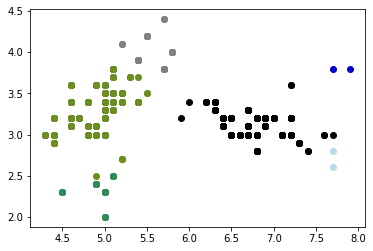

In [1]:
"""
Custom Implementation of DBSCAN
By Livi Poon

Course Notes:

DBSCAN works like this

> For each point that does not yet have a label
    > count how many neighbors it has (points that are within the maximum distance from it)
    > if there are fewer than the mininum number of neighbors, label it as noise and move on to the next point
    > otherwise, give this core point a new cluster label
    > for each of this point's neighbor points
        > if the neighbor already has a label other than noise, move on to the next neighbor
        > otherwise, give the neighbor the same new cluster label
        > if the neighbor has more than the minimum number of neighbors, add all of them to the list of neighbors for this cluster, so that they go through this same loop

"""

import numpy
import math as m
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import random
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
import pandas
import sys

iris = datasets.load_iris() #load dataframe
iris_df = pandas.DataFrame(iris.data) #create a pandas dataframe
iris_df.columns = iris.feature_names #add a column that defines names

#holds all the data points
coordsX = []
coordsY = []
coords = []
#---

history = [] #holds all the datapoints that have been run through regression already
cluster = [] #holds all the points of the cluster
throwaway = [] #used to determine if the circle has the minPoints

for i in range(len(iris.data)): #extracting data from the pandas dataframe
    coordsX.append(iris.data[i][0]) #assigning different values to their respected lists
    coordsY.append(iris.data[i][1])
    coords.append([iris.data[i][0],iris.data[i][1]]) #create an array of x and y coordinates

def dbscan(epsilon, minPoints): #main dbscan function
    global coords #globalize various variables used globally
    global history
    global cluster
    global throwaway

    history = [] #wipe reused/throwaway lists
    cluster = []
    throwaway = []

    #BELOW: error check
    if epsilon <= 0:
        print("ERROR - Epsilon value is less than or equal to 0: " + str(epsilon))
        return

    if str(type(minPoints)) == "int":
        print("ERROR - minPoint value is not a natural number: " + str(minPoints))
        return
    #---

    selectedPoint = random.randrange(len(coords)) #get a random point from the data set to start dbscan

    #BELOW: initialize dbscan by gathering the points around the selectedPoint
        #usage: to prevent running regression on points that do not fit the minPoints criteria
    for i in range(len(coords)):
        #BELOW: to double check if the points are within the epsilon circle 
        #solve sqrt((x2 - x1)**2+(y2 + y2)**2) = c, where c is the distance from point a to point b.
        x = (coords[i][0] - coords[selectedPoint][0]) ** 2
        y = (coords[i][1] - coords[selectedPoint][1]) ** 2
        if m.sqrt(x + y) <= epsilon:
            cluster.append(coords[i])
            throwaway.append(coords[i])#append to throwaway list
        #---
    #---

    #BELOW: regression loop 1
    if len(throwaway) >= minPoints: #begin regression by checking if the amount of
        for i in range(len(cluster)): #for everypoint in cluster
            if cluster[i] in history: #check if the regression has been run on this particular point already
                pass #pass this point if so
            else:
                dbscanRecurrsion(epsilon, minPoints, coords.index(cluster[i])) #if not, run dbscanRecurrsion
    #---

    coords = [x for x in coords if x not in cluster] #remove values that have been assigned to a cluster already

    clusterX = [] #create lists to hold x and y values of the clusters for plotting
    clusterY = []

    for i in range(len(cluster)):
        clusterX.append(cluster[i][0]) #extract x and y values
        clusterY.append(cluster[i][1])

    colors = list(mcolors.CSS4_COLORS) #random colors
    plt.scatter(clusterX,clusterY, c=random.choice(colors)) #plot

    #BELOW: regression loop 2
    if len(coords) == 0: #if the coords list is empty (no more datapoints to assign to a cluster) then the loop stops
        pass
    else:
        dbscan(epsilon, minPoints) #countinue to the next cluster.
    #---


def dbscanRecurrsion(epsilon, minPoints, selectedPoint):
    global coords #globalize variables
    global cluster
    global throwaway
    global history

    history.append(coords[selectedPoint]) #append the point
    throwaway = [] #clear throwaway list

    for i in range(len(coords)): #repeat epsilon check as seen in the dbscan function
        x = (coords[i][0] - coords[selectedPoint][0]) ** 2
        y = (coords[i][1] - coords[selectedPoint][1]) ** 2
        if m.sqrt(x + y) <= epsilon:
            cluster.append(coords[i])
            throwaway.append(coords[i])

dbscan(0.5, 3) #run dbscan
plt.show() #show the plot
